# AML GROUP 12 PROJECT:
by -> Dharun Gautham J (21123006) and Varun Raizada (21105125)


Objective: To determine the profitabilty of a movie prior to it's release. To do this we will be using  classification techniques. We will calculate  if a movie will earn profit (return >1) or loss (return<1).

# Movie Data Set

This dataset is derived from Kaggle "The Movies Dataset".We'll be working with "movies_metadata", the metadata for over 45,000 movies listed in the Full MovieLens Dataset. The dataset consists of movies released on or before July 2017. Data points include budget, revenue, release dates, languages, production companies, countries, IMDB vote counts and vote averages, etc.

Through data information, we can see that the original dataset has 45466 entries, and 24 total columns. Most of columns are object value which cannot be directly feed into neural networks. So we need to process them and change into numeric variables.

# Overview

* a) Data Preparation

* b) Exploratory Data Analysis

* c) Data Engineering

* d) Classification modeling

* e) Results

* f) Conclusion

# Data Gathering and Description

In this part, we'll set up the environment, import modules, read the data, and explore our data. Through the data processing, we'll change data types to fit models, handle missing values, and detect any outliers. After that, we'll wrangle the data, split data into X and y, and do some scalling preparing for modeling.

Below are columns of the datasaet:

* adult - Belongs to adult movies or not
* belongs_to_collection - Belong to movie collections or not
* budget - The budget of a movie. Some movies don't have this, it appears as 0
* genres - Main genre of the movie
* homepage - The website where can see the movie
* id - Identifier column
* imdb_id - Movies id on IMDB
* original_language - Original language of film
* original_title - Original title of film
* overview - Movie content overview
* popularity - shows weather it is popular
* poster_path - jpg. path of the movie poster
* production_companies - The production company
* production_countries - Country of origin
* release_date - Release date (YYYY-MM-DD)
* revenue - The revenue of a movie. Some movies don't have this, it appears as 0
* runtime - Duration of the movie
* spoken_languages - Languages spoken throughout the film
* status - Release or others
* tagline - Movie tagline to advertise
* title - English title
* video - True of False
* vote_average - TMDB vote average
* vote_count - TMDB vote count

In [1]:
# for reading data
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline
from scipy import stats
from sklearn.preprocessing import MinMaxScaler

# For data splitting
from sklearn.model_selection import train_test_split

# for modeling
from sklearn.linear_model import LogisticRegression # LR
from keras import models # ANN
from keras import layers
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.layers import Dense
from sklearn import svm # SVM
from sklearn.tree import DecisionTreeClassifier # DTR
from sklearn.neighbors import KNeighborsClassifier # KNN
from sklearn.model_selection import GridSearchCV

# classification error metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv("movies_metadata.csv")

# Head, Shape, Column names, data types, missing values, Outliers

In [3]:
#Summary of original dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 24 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   adult                  45466 non-null  object 
 1   belongs_to_collection  4494 non-null   object 
 2   budget                 45466 non-null  object 
 3   genres                 45466 non-null  object 
 4   homepage               7782 non-null   object 
 5   id                     45466 non-null  object 
 6   imdb_id                45449 non-null  object 
 7   original_language      45455 non-null  object 
 8   original_title         45466 non-null  object 
 9   overview               44512 non-null  object 
 10  popularity             45461 non-null  object 
 11  poster_path            45080 non-null  object 
 12  production_companies   45463 non-null  object 
 13  production_countries   45463 non-null  object 
 14  release_date           45379 non-null  object 
 15  re

In [4]:
#Shape of original dataset
df.shape

(45466, 24)

There are a total of 45,466 movies with 24 features. Most of the features have very few NaN values (apart from homepage and tagline). We will attempt at cleaning this dataset to a form suitable for analysis in the next section.

In [5]:
#Let's look into first few rows of the dataset to check the content of each column
df.head()

,adult,belongs_to_collection,budget,genres,homepage,id,imdb_id,original_language,original_title,overview,...,release_date,revenue,runtime,spoken_languages,status,tagline,title,video,vote_average,vote_count
0,False,"{'id': 10194, 'name': 'Toy Story Collection', ...",30000000,"[{'id': 16, 'name': 'Animation'}, {'id': 35, '...",http://toystory.disney.com/toy-story,862,tt0114709,en,Toy Story,"Led by Woody, Andy's toys live happily in his ...",...,1995-10-30,373554033.0,81.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,NaN,Toy Story,False,7.7,5415.0
1,False,NaN,65000000,"[{'id': 12, 'name': 'Adventure'}, {'id': 14, '...",NaN,8844,tt0113497,en,Jumanji,When siblings Judy and Peter discover an encha...,...,1995-12-15,262797249.0,104.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Roll the dice and unleash the excitement!,Jumanji,False,6.9,2413.0
2,False,"{'id': 119050, 'name': 'Grumpy Old Men Collect...",0,"[{'id': 10749, 'name': 'Romance'}, {'id': 35, ...",NaN,15602,tt0113228,en,Grumpier Old Men,A family wedding reignites the ancient feud be...,...,1995-12-22,0.0,101.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Still Yelling. Still Fighting. Still Ready for...,Grumpier Old Men,False,6.5,92.0
3,False,NaN,16000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,31357,tt0114885,en,Waiting to Exhale,"Cheated on, mistreated and stepped on, the wom...",...,1995-12-22,81452156.0,127.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Friends are the people who let you be yourself...,Waiting to Exhale,False,6.1,34.0
4,False,"{'id': 96871, 'name': 'Father of the Bride Col...",0,"[{'id': 35, 'name': 'Comedy'}]",NaN,11862,tt0113041,en,Father of the Bride Part II,Just when George Banks has recovered from his ...,...,1995-02-10,76578911.0,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Just When His World Is Back To Normal... He's ...,Father of the Bride Part II,False,5.7,173.0


Text(0.5, 0, 'Voter Rating')

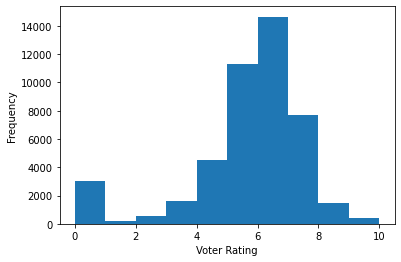

In [6]:
# voter_rating vs frequency plot

df['vote_average'].plot.hist()
plt.xlabel('Voter Rating')

Text(0, 0.5, 'No. of Voters')

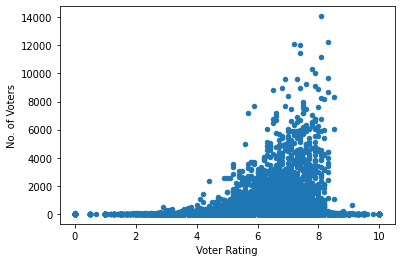

In [7]:
# Voter Rating vs No. of Voters plot

df.plot.scatter("vote_average", "vote_count")
plt.xlabel('Voter Rating')
plt.ylabel('No. of Voters')

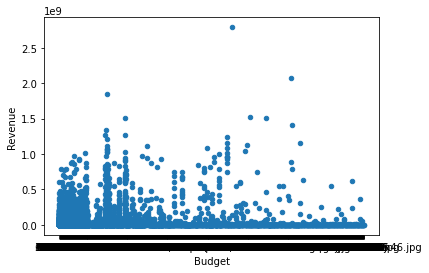

In [8]:
#Budget and Revenue scatter plot

df.plot.scatter("budget", "revenue")
plt.xlabel('Budget')
plt.ylabel('Revenue')
plt.show()

# Data Engineering

In [9]:
# As we will be concentrating on numerical columns let's delete the text columns, which we do not need for solving the business problem
df.drop(['id','belongs_to_collection', 'homepage', 'imdb_id', 'original_language', 'original_title', 'overview', 'poster_path', 'production_companies', 'production_countries', 'runtime', 'release_date', 'spoken_languages', 'status', 'tagline', 'title', 'video'], axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45466 entries, 0 to 45465
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   adult         45466 non-null  object 
 1   budget        45466 non-null  object 
 2   genres        45466 non-null  object 
 3   popularity    45461 non-null  object 
 4   revenue       45460 non-null  float64
 5   vote_average  45460 non-null  float64
 6   vote_count    45460 non-null  float64
dtypes: float64(3), object(4)
memory usage: 2.4+ MB


In [10]:
df[df['revenue'] == 0].shape

(38052, 7)

We see that the majority of the movies have a recorded revenue of 0. This indicates that we do not have information about the total revenue for these movies. Although this forms the majority of the movies available to us, we will use revenue for classification purpose  from the remaining 7000 movies.

In [11]:
df['revenue'] = df['revenue'].replace(0, np.nan)

The budget feature has some unclean values that makes Pandas assign it as a generic object. We proceed to convert this into a numeric variable and replace all the non-numeric values with NaN. Finally, as with budget, we will convert all the values of 0 with NaN to indicate the absence of information regarding budget.

In [12]:
df['budget'] = pd.to_numeric(df['budget'], errors='coerce')
df['budget'] = df['budget'].replace(0, np.nan)
df[df['budget'].isnull()].shape

(36576, 7)

We will create a return feature that will help us capture a more accurate picture of the financial success of a movie. Presently, our data will not be able to judge if a 200 million dollar budget movie that earned 100 million dollar did better than a 50,000 dollars budget movie taking in 200,000 dollars. This feature will be able to capture that information.

A return value > 1 would indicate profit whereas a return value < 1 would indicate a loss.

In [13]:
df['return'] = df['revenue'] / df['budget']
df[df['return'].isnull()].shape

(40085, 8)

In [14]:
df['adult'].value_counts()

False                                                                                                                             45454
True                                                                                                                                  9
 - Written by Ørnås                                                                                                                   1
 Rune Balot goes to a casino connected to the October corporation to try to wrap up her case once and for all.                        1
 Avalanche Sharks tells the story of a bikini contest that turns into a horrifying affair when it is hit by a shark avalanche.        1
Name: adult, dtype: int64

There are only 9 adult movies in this dataset. The adult feature therefore is not of much use to us and can be safely dropped.

In [15]:
df = df.drop('adult', axis=1)

Exploring Popularity, Vote Average and Vote Count

In [16]:
def clean_numeric(x):
    try:
        return float(x)
    except:
        return np.nan

In [17]:
df['popularity'] = df['popularity'].apply(clean_numeric).astype('float')
df["vote_count"] = df["vote_count"].apply(clean_numeric).astype('float')
df['vote_average'] = df['vote_average'].apply(clean_numeric).astype('float')

In [18]:
#Summary statistics of each feature
df['popularity'].describe()

count    45460.000000
mean         2.921478
std          6.005414
min          0.000000
25%          0.385948
50%          1.127685
75%          3.678902
max        547.488298
Name: popularity, dtype: float64

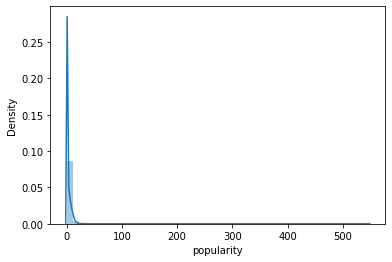

In [19]:
sns.distplot(df['popularity'].fillna(df['popularity'].median()))
plt.show()

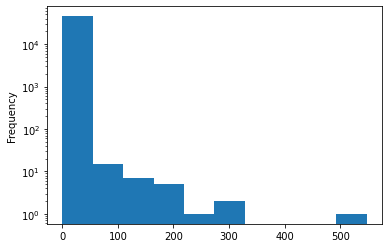

In [20]:
df['popularity'].plot(logy=True, kind='hist')

The Popularity score seems to be an extremely skewed quantity with a mean of only 2.9 but maximum values reaching as high as 547, which is almost 1800% greater than the mean. However, as can be seen from the distribution plot, almost all movies have a popularity score less than 10 (the 75th percentile is at 3.678902).

In [21]:
df['vote_count'].describe()

count    45460.000000
mean       109.897338
std        491.310374
min          0.000000
25%          3.000000
50%         10.000000
75%         34.000000
max      14075.000000
Name: vote_count, dtype: float64

As with popularity scores, the distribution of vote counts is extremely skewed with the median vote count standing at a paltry 10 votes. The most votes a single movie has got stands at 14,07

In [22]:
df['vote_average'] = df['vote_average'].replace(0, np.nan)
df['vote_average'].describe()

count    42462.000000
mean         6.014877
std          1.256208
min          0.500000
25%          5.300000
50%          6.100000
75%          6.900000
max         10.000000
Name: vote_average, dtype: float64

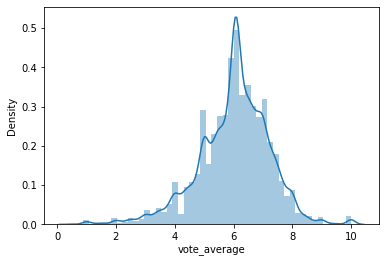

In [23]:
sns.distplot(df['vote_average'].fillna(df['vote_average'].median()))

It appears that Users in this dataset are extremely strict in their ratings. The mean rating is only a 5.6 on a scale of 10. Half the movies have a rating of less than or equal to 6

Let's explore budget and revenue a bit more!

In [24]:
df['budget'].describe()

count    8.890000e+03
mean     2.160428e+07
std      3.431063e+07
min      1.000000e+00
25%      2.000000e+06
50%      8.000000e+06
75%      2.500000e+07
max      3.800000e+08
Name: budget, dtype: float64

The mean budget of a film is 21.6 million dollars whereas the median budget is far smaller at 8 million dollars. This strongly suggests the mean being influenced by outliers.

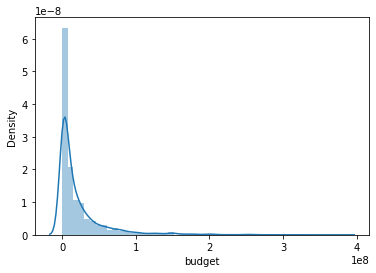

In [25]:
sns.distplot(df[df['budget'].notnull()]['budget'])

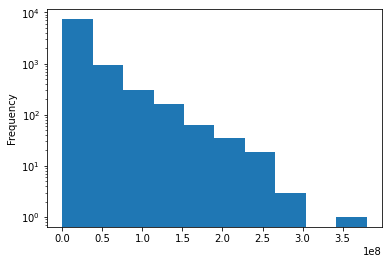

In [26]:
df['budget'].plot(logy=True, kind='hist')

The distribution of movie budgets shows an exponential decay. More than 75% of the movies have a budget smaller than 25 million dollars.

In [27]:
df['revenue'].describe()

count    7.408000e+03
mean     6.878739e+07
std      1.464203e+08
min      1.000000e+00
25%      2.400000e+06
50%      1.682272e+07
75%      6.722707e+07
max      2.787965e+09
Name: revenue, dtype: float64

The mean gross of a movie is 68.7 million dollars whereas the median gross is much lower at 16.8 million dollars, suggesting the skewed nature of revenue. The lowest revenue generated by a movie is just 1 dollar whereas the highest grossing movie of all time is astonishing 2.78 billion dollars.

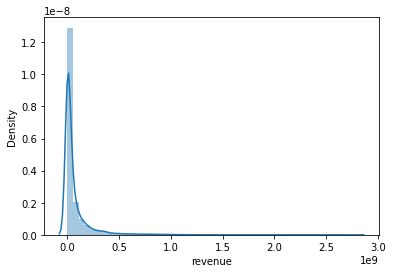

In [28]:
sns.distplot(df[df['revenue'].notnull()]['revenue'])

The distribution of revenue undergoes exponential decay just like budget.

In [29]:
#Let's check the number of missing values in the dataset
df.isnull().sum()

budget          36576
genres              0
popularity          6
revenue         38058
vote_average     3004
vote_count          6
return          40085
dtype: int64

As mentioned earlier our original dataset has lot of missing values but our analysis can still be done with the small set of rows as well. We will be further exploring these in our outlier detection section.

In [30]:
#Dropping rows with missing values
df.dropna(inplace=True)
#Check the number of missing values to ensure we have none
df.isnull().sum()

budget          0
genres          0
popularity      0
revenue         0
vote_average    0
vote_count      0
return          0
dtype: int64

We will perform the following feature engineering tasks:

1. Round up popularity values to 2 decimal values and we will be converting those into integer datatypes.
2. We will be creating dummy variables for column: genres

In [31]:
df["popularity"] = np.round(pd.to_numeric(df.popularity, errors='coerce'),2)
df.info()
df.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5374 entries, 0 to 45422
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   budget        5374 non-null   float64
 1   genres        5374 non-null   object 
 2   popularity    5374 non-null   float64
 3   revenue       5374 non-null   float64
 4   vote_average  5374 non-null   float64
 5   vote_count    5374 non-null   float64
 6   return        5374 non-null   float64
dtypes: float64(6), object(1)
memory usage: 335.9+ KB


(5374, 7)

In [32]:
#converting 'genre' column into panda series and extract the type of the genre only from the column
s = pd.Series(df['genres'], dtype= str)
s1=s.str.split(pat="'",expand=True)
df['genre_ed']=s1[5]

In [33]:
#count of each genre in the dataset
df['genre_ed'].value_counts()

Drama              1313
Comedy             1067
Action              960
Adventure           416
Horror              325
Crime               267
Thriller            199
Animation           146
Fantasy             140
Romance             121
Science Fiction     104
Mystery              67
Family               55
Documentary          47
War                  38
Music                34
Western              31
History              29
Foreign               4
TV Movie              1
Name: genre_ed, dtype: int64

The dataset has most rows for Drama and Comedy. We will concentrate only gneres which has more than 100 rows

In [34]:
#Remove rows for genres with count less than 100
df=df[~df['genre_ed'].isin(['Mystery', 'Family', 'Documentary', 'War', 'Music', 'Western', 'History', 'Foreign', 'TV Movie'])]

In [35]:
#Drop original column from dataset
df.drop(['genres'], axis=1, inplace=True)
#get dummy columns for genre
df= pd.get_dummies(df, columns=["genre_ed"])
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5068 entries, 0 to 45422
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   budget                    5068 non-null   float64
 1   popularity                5068 non-null   float64
 2   revenue                   5068 non-null   float64
 3   vote_average              5068 non-null   float64
 4   vote_count                5068 non-null   float64
 5   return                    5068 non-null   float64
 6   genre_ed_Action           5068 non-null   uint8  
 7   genre_ed_Adventure        5068 non-null   uint8  
 8   genre_ed_Animation        5068 non-null   uint8  
 9   genre_ed_Comedy           5068 non-null   uint8  
 10  genre_ed_Crime            5068 non-null   uint8  
 11  genre_ed_Drama            5068 non-null   uint8  
 12  genre_ed_Fantasy          5068 non-null   uint8  
 13  genre_ed_Horror           5068 non-null   uint8  
 14  genre_e

,budget,popularity,revenue,vote_average,vote_count,return,genre_ed_Action,genre_ed_Adventure,genre_ed_Animation,genre_ed_Comedy,genre_ed_Crime,genre_ed_Drama,genre_ed_Fantasy,genre_ed_Horror,genre_ed_Romance,genre_ed_Science Fiction,genre_ed_Thriller
0,30000000.0,21.95,373554033.0,7.7,5415.0,12.451801,0,0,1,0,0,0,0,0,0,0,0
1,65000000.0,17.02,262797249.0,6.9,2413.0,4.043035,0,1,0,0,0,0,0,0,0,0,0
3,16000000.0,3.86,81452156.0,6.1,34.0,5.090760,0,0,0,1,0,0,0,0,0,0,0
5,60000000.0,17.92,187436818.0,7.7,1886.0,3.123947,1,0,0,0,0,0,0,0,0,0,0
8,35000000.0,5.23,64350171.0,5.5,174.0,1.838576,1,0,0,0,0,0,0,0,0,0,0


In [36]:
#Summary statistics of dataset 
df.describe()

,budget,popularity,revenue,vote_average,vote_count,return,genre_ed_Action,genre_ed_Adventure,genre_ed_Animation,genre_ed_Comedy,genre_ed_Crime,genre_ed_Drama,genre_ed_Fantasy,genre_ed_Horror,genre_ed_Romance,genre_ed_Science Fiction,genre_ed_Thriller
count,5.068000e+03,5068.000000,5.068000e+03,5068.000000,5068.000000,5.068000e+03,5068.000000,5068.000000,5068.000000,5068.000000,5068.000000,5068.000000,5068.000000,5068.000000,5068.000000,5068.000000,5068.000000
mean,3.139018e+07,9.683341,9.101329e+07,6.265331,743.364838,5.079909e+03,0.189424,0.082084,0.028808,0.210537,0.052684,0.259077,0.027624,0.064128,0.023875,0.020521,0.039266
std,4.033230e+07,11.134203,1.654210e+08,0.901434,1260.296003,2.155497e+05,0.391884,0.274519,0.167284,0.407730,0.223423,0.438171,0.163910,0.245005,0.152676,0.141788,0.194246
min,1.000000e+00,0.000000,1.000000e+00,1.000000,1.000000,5.217391e-07,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.793275e+06,5.530000,7.260166e+06,5.700000,81.000000,7.992701e-01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.700000e+07,8.430000,3.055244e+07,6.300000,284.500000,2.066622e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,4.000000e+07,11.752500,1.005295e+08,6.900000,824.000000,4.229621e+00,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,3.800000e+08,294.340000,2.787965e+09,9.100000,14075.000000,1.239638e+07,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


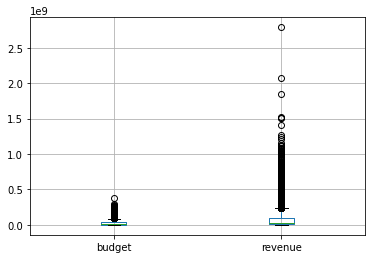

In [37]:
#Let's check for outliers
df.boxplot(column=['budget', 'revenue'])

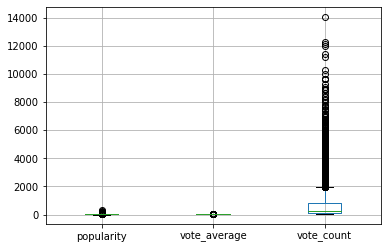

In [38]:
df.boxplot(column=['popularity', 'vote_average', 'vote_count'])

In [39]:
df_o= df[(np.nan_to_num(np.abs(stats.zscore(df,nan_policy='omit')),0) < 3).all(axis=1)]

In [40]:
df.shape
print ('Shape of original input dataset:', df.shape)
#After removing outliers
df_o.shape
print ('Shape of input dataset after removing outliers:', df_o.shape)

Shape of original input dataset: (5068, 17)
Shape of input dataset after removing outliers: (3208, 17)


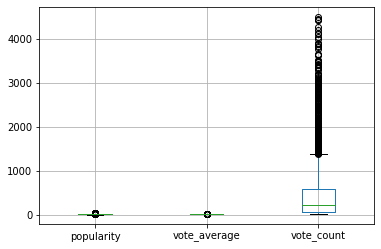

In [41]:
df_o.boxplot(column=['popularity', 'vote_average', 'vote_count'])

In [42]:
Q1 = df_o.quantile(0.25)
Q3 = df_o.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

budget                      3.000000e+07
popularity                  5.860000e+00
revenue                     6.972057e+07
vote_average                1.200000e+00
vote_count                  5.290000e+02
return                      3.254867e+00
genre_ed_Action             1.000000e+00
genre_ed_Adventure          0.000000e+00
genre_ed_Animation          0.000000e+00
genre_ed_Comedy             1.000000e+00
genre_ed_Crime              0.000000e+00
genre_ed_Drama              1.000000e+00
genre_ed_Fantasy            0.000000e+00
genre_ed_Horror             0.000000e+00
genre_ed_Romance            0.000000e+00
genre_ed_Science Fiction    0.000000e+00
genre_ed_Thriller           0.000000e+00
dtype: float64


In [43]:
df_out = df_o[~((df_o < (Q1 - 1.5 * IQR)) |(df_o > (Q3 + 1.5 * IQR))).any(axis=1)]

In [44]:
print ('Shape of input dataset after managing misspread:', df_out.shape)

Shape of input dataset after managing misspread: (2488, 17)


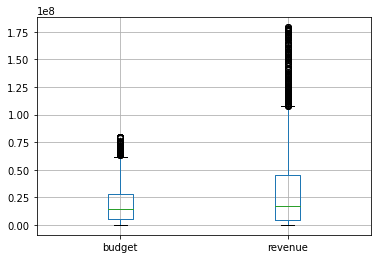

In [45]:
df_out.boxplot(column=['budget', 'revenue'])

In [46]:
df_out['revenue'].describe()

count    2.488000e+03
mean     3.209871e+07
std      3.910949e+07
min      1.000000e+00
25%      4.100000e+06
50%      1.680970e+07
75%      4.551842e+07
max      1.792134e+08
Name: revenue, dtype: float64

In [47]:
df_out.drop(['revenue'],axis=1, inplace=True)

Text(0, 0.5, 'Frequency')

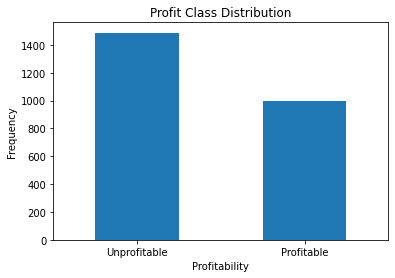

In [48]:
df_out['return']=df_out['return'].mask(df_out['return']<1,0)
df_out['return']=df_out['return'].mask(df_out['return']>1,1)
df_out.value_counts(df_out['return']).plot(kind = 'bar', rot=0)
plt.title("Profit Class Distribution")
LABELS=['Unprofitable','Profitable']
plt.xticks(range(2), LABELS)
plt.xlabel("Profitability")
plt.ylabel("Frequency")

We can't use return directly here. We will consider a two class classification problem with return>1 (profit) as one class and return<1 (loss) as another class.

In [49]:
df_out

,budget,popularity,vote_average,vote_count,return,genre_ed_Action,genre_ed_Adventure,genre_ed_Animation,genre_ed_Comedy,genre_ed_Crime,genre_ed_Drama,genre_ed_Fantasy,genre_ed_Horror,genre_ed_Romance,genre_ed_Science Fiction,genre_ed_Thriller
3,16000000.0,3.86,6.1,34.0,1.0,0,0,0,1,0,0,0,0,0,0,0
8,35000000.0,5.23,5.5,174.0,1.0,1,0,0,0,0,0,0,0,0,0,0
10,62000000.0,6.32,6.5,199.0,1.0,0,0,0,1,0,0,0,0,0,0,0
15,52000000.0,10.14,7.8,1343.0,1.0,0,0,0,0,0,1,0,0,0,0,0
16,16500000.0,10.67,7.2,364.0,1.0,0,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44848,2000000.0,1.46,5.3,9.0,1.0,0,0,0,1,0,0,0,0,0,0,0
44856,3000000.0,0.45,4.7,3.0,0.0,0,0,0,1,0,0,0,0,0,0,0
44970,2196531.0,0.95,5.6,10.0,1.0,0,0,0,1,0,0,0,0,0,0,0
45250,12000000.0,1.32,6.9,25.0,1.0,1,0,0,0,0,0,0,0,0,0,0


# Split Data into X and Y

In [50]:
# Assign X and Y
X = df_out.drop(['return'], axis=1)
y = df_out['return']

print(X.shape)
print(y.shape)

(2488, 15)
(2488,)


In [51]:
import imblearn.under_sampling as u
# Random Oversampling to balance the class distribution
from collections import Counter
from sklearn.datasets import make_classification
from imblearn.over_sampling import RandomOverSampler

X,y = make_classification(n_features = X.shape[1], n_samples=X.shape[0]) 
ros = u.RandomUnderSampler(sampling_strategy='majority')
X_resampled, Y_resampled = ros.fit_resample(X, y)

In [52]:
X_resampled = pd.DataFrame(X_resampled)
print(X_resampled.shape)

Y_resampled = pd.DataFrame(Y_resampled)
print(Y_resampled.shape)

(2478, 15)
(2478, 1)


In [53]:
X_resampled.columns = ['budget', 'popularity', 'vote_average', 'vote_count',
       'genre_ed_Action', 'genre_ed_Adventure', 'genre_ed_Animation',
       'genre_ed_Comedy', 'genre_ed_Crime', 'genre_ed_Drama',
       'genre_ed_Fantasy', 'genre_ed_Horror', 'genre_ed_Romance',
       'genre_ed_Science Fiction', 'genre_ed_Thriller']

In [54]:
X_resampled

,budget,popularity,vote_average,vote_count,genre_ed_Action,genre_ed_Adventure,genre_ed_Animation,genre_ed_Comedy,genre_ed_Crime,genre_ed_Drama,genre_ed_Fantasy,genre_ed_Horror,genre_ed_Romance,genre_ed_Science Fiction,genre_ed_Thriller
0,1.598800,-1.654683,0.346760,0.487214,-0.805698,0.979491,-0.181536,-1.683293,-0.141113,1.192313,-0.637861,-1.829882,0.081181,-0.624192,0.288074
1,2.360924,-0.761822,-1.479364,0.390014,1.319217,1.060469,0.932113,-0.563320,-1.447062,1.600234,-0.454368,1.502593,-1.664957,-0.416740,1.055483
2,0.734511,-2.658427,-1.147701,-0.714406,-0.504738,-2.849529,-0.549877,-2.720365,-0.122418,1.836248,0.486537,0.684286,0.542978,0.164341,1.938150
3,1.507730,-0.104023,-1.211337,-0.810365,-0.063903,-1.327340,-0.642072,-0.521398,2.704573,-1.989024,0.811070,-0.618686,0.266218,0.604282,-0.185749
4,-0.368942,0.841113,-0.515814,-2.472794,0.571993,-1.308883,-1.420354,0.756645,0.718208,-1.097822,-0.484743,0.275348,0.949350,-0.321327,-0.214434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2473,-0.229072,0.417001,-0.032904,0.501111,1.483214,0.314076,-0.959396,0.617199,-1.224518,0.658000,0.094880,-0.318821,-0.213669,-0.346609,-1.640387
2474,-0.248924,0.557018,0.121095,0.246023,-0.504394,-0.874529,0.661629,0.359622,1.399255,-1.429579,0.807912,-0.618798,1.407622,-0.795267,-0.322658
2475,2.229793,0.934412,-1.272813,-0.165784,-0.233679,-0.870201,-0.536162,0.997641,-0.227667,-0.439519,1.733348,0.952719,-0.706093,0.744746,-0.492885
2476,1.176170,-0.229494,0.055064,-0.309182,0.000783,-2.278315,-1.113296,-0.553944,2.072968,-1.426322,0.416729,0.662383,0.089359,0.980069,0.891572


In [55]:
# We will be performing 80/20 split
X_train, X_test, y_train, y_test = train_test_split(X_resampled, Y_resampled,
                                                    test_size = 0.20,
                                                    shuffle = True,
                                                    random_state = 42)

In [56]:
X_train

,budget,popularity,vote_average,vote_count,genre_ed_Action,genre_ed_Adventure,genre_ed_Animation,genre_ed_Comedy,genre_ed_Crime,genre_ed_Drama,genre_ed_Fantasy,genre_ed_Horror,genre_ed_Romance,genre_ed_Science Fiction,genre_ed_Thriller
2464,-0.376968,2.192452,-0.284886,1.055423,-0.496786,-0.712943,-0.139687,2.234483,0.160056,-1.559337,-0.358350,0.197528,0.020858,-0.200832,-1.066185
1561,0.561894,0.940982,0.587513,-0.023669,0.227949,0.031655,0.248240,0.798579,1.116279,-1.466099,-1.199671,-0.564967,0.142457,1.396647,0.797771
2469,1.958893,0.440381,1.768330,0.353740,0.619676,0.299265,1.137919,0.207227,1.609617,-1.513112,0.443671,-0.119375,0.065870,-0.041687,-0.659334
1513,-0.097455,2.659243,0.385920,-1.050459,1.008672,-2.000633,0.437005,2.746229,-0.040966,-1.712505,0.482210,-2.239173,0.994307,0.045463,-3.070495
1133,-1.013164,1.977028,1.541909,1.302869,-1.086843,0.337660,-0.938001,1.673436,2.374056,-3.102161,1.025811,-1.177453,-0.647078,0.776997,-1.265387
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1638,-0.907511,0.779662,1.037018,-0.072144,-2.006602,0.767428,-0.918268,0.944835,-0.923960,0.191585,-0.815322,0.036226,1.343975,0.601364,-0.853810
1095,0.717811,-0.910108,-1.723067,-0.077548,-1.356430,0.529143,1.130610,-0.876613,-0.399066,0.900307,3.066270,-1.270197,0.368304,-0.029323,-0.740094
1130,-0.811769,-0.434905,-0.261636,0.598440,-0.612655,-2.225672,-0.795524,-0.694066,1.605959,-0.936404,0.218054,0.775111,-0.033713,-0.428738,-0.247900
1294,0.634405,1.540785,1.365026,0.112224,0.934790,-0.481134,0.617043,1.717856,-0.850810,-0.363125,-0.343400,-0.074224,0.272693,-1.532962,0.131898


In [57]:
# shape check
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1982, 15) (496, 15) (1982, 1) (496, 1)


# 1) Logistic Regression Model

In [58]:
#Fit the model
LR = LogisticRegression()
LR = LR.fit(X_train, y_train)

In [59]:
# store the predictions
train_preds_LR = LR.predict(X_train) 
test_preds_LR = LR.predict(X_test) 

In [60]:
#Evaluate the model
# train confusion matrix
confusion_matrix(y_train, train_preds_LR)

array([[845, 146],
       [110, 881]])

In [61]:
# test confusion matrix
confusion_matrix(y_test, test_preds_LR)

array([[189,  59],
       [ 22, 226]])

In [62]:
# extract TP, TN, FP, FN
tn, fp, fn, tp = confusion_matrix(y_test, test_preds_LR).ravel()
(tn, fp, fn, tp)

(189, 59, 22, 226)

In [63]:
ac1 = accuracy_score(y_test,test_preds_LR)
print('accuracy for Logistic regression =', round(ac1*100,5) , '%')
print(classification_report(y_test, test_preds_LR))

accuracy for Logistic regression = 83.66935 %
              precision    recall  f1-score   support

           0       0.90      0.76      0.82       248
           1       0.79      0.91      0.85       248

    accuracy                           0.84       496
   macro avg       0.84      0.84      0.84       496
weighted avg       0.84      0.84      0.84       496



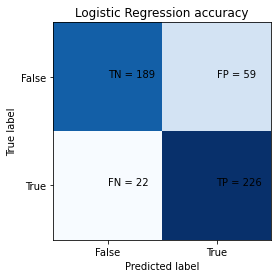

In [64]:
cm = confusion_matrix(y_test, test_preds_LR)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['False','True']
plt.title('Logistic Regression accuracy')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))

#2) ANN

In [65]:
# Setting up the model
ann = Sequential()
# this is hidden layer 1
ann.add(Dense(6,activation='relu', input_shape=(X.shape[1],))) # input shape is = (features,)
# this is hidden layer 2
ann.add(Dense(6, activation='relu'))
# this is the output node
ann.add(Dense(1, activation='sigmoid')) 

In [66]:
ann.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 6)                 96        
                                                                 
 dense_1 (Dense)             (None, 6)                 42        
                                                                 
 dense_2 (Dense)             (None, 1)                 7         
                                                                 
Total params: 145
Trainable params: 145
Non-trainable params: 0
_________________________________________________________________


In [67]:
layer=ann.layers[0]
W=layer.get_weights()
W

[array([[-0.16145474,  0.00284117,  0.06090337, -0.16029772, -0.4555411 ,
         -0.01142347],
        [ 0.35624856, -0.5053363 ,  0.4287151 , -0.32741207,  0.3964749 ,
         -0.27638403],
        [-0.43384314,  0.24315327,  0.51364154,  0.3242672 , -0.11918974,
         -0.42190787],
        [-0.4111472 ,  0.49851328,  0.30974758, -0.299892  ,  0.2852921 ,
          0.04053462],
        [ 0.21385121, -0.25766283, -0.5063126 , -0.08326197,  0.12957561,
         -0.48056242],
        [-0.0383178 , -0.28886932,  0.18347472,  0.4256763 , -0.31438297,
          0.5003106 ],
        [-0.05969256,  0.18776578,  0.49640125,  0.10823846, -0.34375513,
          0.3659112 ],
        [-0.5198155 ,  0.32263142,  0.40704966, -0.00884372,  0.47323674,
         -0.09795147],
        [-0.17976749,  0.18948644,  0.27681643,  0.42541134, -0.42956156,
         -0.5331335 ],
        [-0.12442625, -0.19381154, -0.49562827, -0.3758703 ,  0.44287175,
          0.04488581],
        [ 0.2499057 ,  0.43287

In [68]:
layer=ann.layers[1]
W=layer.get_weights()
W

[array([[-0.07693231,  0.20576864,  0.6758805 ,  0.22390175,  0.21764815,
         -0.6226312 ],
        [ 0.30807167, -0.3008516 ,  0.50988513,  0.7051433 , -0.1687501 ,
          0.56249017],
        [-0.03050488, -0.28284597,  0.48338383, -0.1752277 ,  0.01545376,
         -0.12042683],
        [ 0.06717366, -0.54902035, -0.38190743,  0.4252748 ,  0.5749958 ,
          0.11619633],
        [ 0.3422014 ,  0.34184223, -0.6774061 , -0.5192686 ,  0.4187309 ,
         -0.27823833],
        [ 0.22319674, -0.37747306, -0.07027245, -0.07249361, -0.2687949 ,
          0.38301367]], dtype=float32),
 array([0., 0., 0., 0., 0., 0.], dtype=float32)]

In [69]:
layer=ann.layers[2]
W=layer.get_weights()
W

[array([[-0.17159939],
        [-0.4610484 ],
        [ 0.00832844],
        [ 0.635885  ],
        [ 0.6490892 ],
        [ 0.61394465]], dtype=float32), array([0.], dtype=float32)]

In [70]:
#  this compiles the model, specifies model evaluation metrics
ann.compile(optimizer='Adam', loss='binary_crossentropy',
              metrics=['accuracy'])

In [71]:
es2 = EarlyStopping(monitor='val_loss', mode='min', 
                   patience=10, 
                   verbose=1,
                   restore_best_weights=True)
# fit model
history2 = ann.fit(X_train, y_train, 
                    validation_data=(X_test, y_test),
                    epochs=100, 
                    batch_size = 44,
                    verbose=1, 
                    callbacks=[es2])

Epoch 1/100
46/46 [==============================] - 2s 19ms/step - loss: 0.7604 - accuracy: 0.5373 - val_loss: 0.7396 - val_accuracy: 0.5363
Epoch 2/100
46/46 [==============================] - 0s 8ms/step - loss: 0.6897 - accuracy: 0.6216 - val_loss: 0.6800 - val_accuracy: 0.6351
Epoch 3/100
46/46 [==============================] - 0s 8ms/step - loss: 0.6358 - accuracy: 0.7144 - val_loss: 0.6282 - val_accuracy: 0.7238
Epoch 4/100
46/46 [==============================] - 0s 6ms/step - loss: 0.5825 - accuracy: 0.7770 - val_loss: 0.5786 - val_accuracy: 0.7581
Epoch 5/100
46/46 [==============================] - 0s 5ms/step - loss: 0.5294 - accuracy: 0.8179 - val_loss: 0.5299 - val_accuracy: 0.7903
Epoch 6/100
46/46 [==============================] - 0s 8ms/step - loss: 0.4800 - accuracy: 0.8385 - val_loss: 0.4903 - val_accuracy: 0.8004
Epoch 7/100
46/46 [==============================] - 0s 9ms/step - loss: 0.4342 - accuracy: 0.8481 - val_loss: 0.4552 - val_accuracy: 0.8306
Epoch 8/100


In [72]:
history_dict2 = history2.history
history_dict2.keys() 

# out of all of these, let's plot the val_mean_absolute_error

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

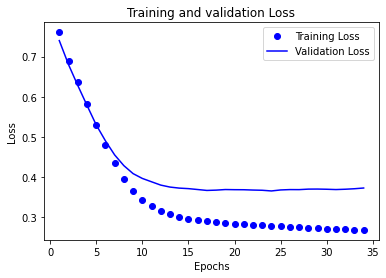

In [73]:
ac2 = history2.history['accuracy']
val_ac2 = history2.history['val_accuracy']
loss2 = history2.history['loss']
val_loss2 = history2.history['val_loss']

epochs2 = range(1, len(ac2) + 1)

# "bo" is for "blue dot"
plt.plot(epochs2, loss2, 'bo', label='Training Loss')
# b is for "solid blue line"
plt.plot(epochs2, val_loss2, 'b', label='Validation Loss')
plt.title('Training and validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

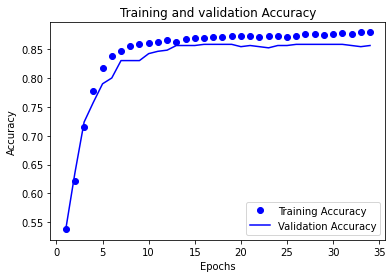

In [74]:
plt.plot(epochs2, ac2, 'bo', label='Training Accuracy')
plt.plot(epochs2, val_ac2, 'b', label='Validation Accuracy')
plt.title('Training and validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

In [75]:
# if we don't round to a whole number (0 or 1), the confusion matrix won't work!
preds2 = np.round(ann.predict(X_test),0)

# confusion matrix
confusion_matrix(y_test, preds2)

# TP is bottom right
# TN is top left
# FP is top right
# FN is bottom left

array([[196,  52],
       [ 19, 229]])

In [76]:
ac3 = accuracy_score(y_test,preds2)
print('accuracy =',ac3)
print(classification_report(y_test, preds2))

accuracy = 0.8568548387096774
              precision    recall  f1-score   support

           0       0.91      0.79      0.85       248
           1       0.81      0.92      0.87       248

    accuracy                           0.86       496
   macro avg       0.86      0.86      0.86       496
weighted avg       0.86      0.86      0.86       496



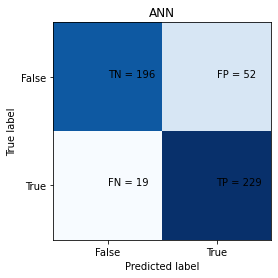

In [77]:
cm = confusion_matrix(y_test, preds2)
plt.clf()
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
classNames = ['False','True']
plt.title('ANN')
plt.ylabel('True label')
plt.xlabel('Predicted label')
tick_marks = np.arange(len(classNames))
plt.xticks(tick_marks, classNames)
plt.yticks(tick_marks, classNames)
s = [['TN','FP'], ['FN', 'TP']]
for i in range(2):
    for j in range(2):
        plt.text(j,i, str(s[i][j])+" = "+str(cm[i][j]))
plt.show()

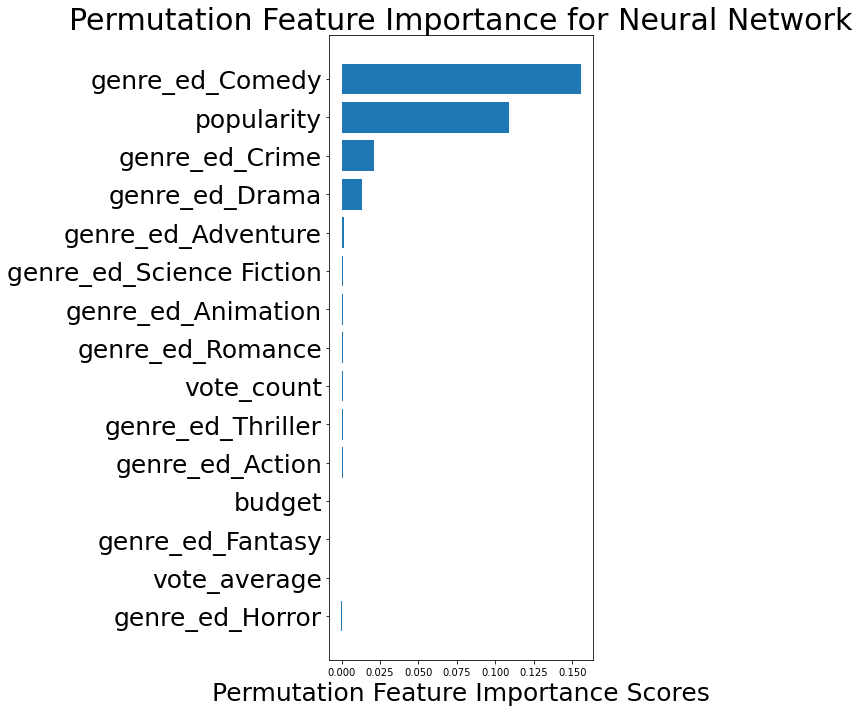

In [78]:
#Feature Importance for ANN

from sklearn.inspection import permutation_importance

results = permutation_importance(ann,X_train,y_train, scoring='neg_root_mean_squared_error')

plt.figure(figsize=(10,10))

#get importance
importance_nn = results.importances_mean
sorted_idx = np.argsort(importance_nn)
pos = np.arange(sorted_idx.shape[0]) + .5
plt.barh(pos, importance_nn[sorted_idx],align='center')

plt.yticks(pos,X_train.columns[sorted_idx],fontsize=25)
plt.xlabel('Permutation Feature Importance Scores', fontsize=25)
#plt.xticks(fontsize=100)
plt.title('Permutation Feature Importance for Neural Network', fontsize=30)

plt.tight_layout()

plt.show()

# 3) SVM

In [79]:
param_grid = {'C': [1, 10, 100],
              'gamma': [1, 0.1, 0.01],
              'kernel': ['rbf']}
 
svc = GridSearchCV(svm.SVC(), param_grid, refit = True, verbose = 1)
svc.fit(X_train,y_train)

Fitting 5 folds for each of 9 candidates, totalling 45 fits


GridSearchCV(estimator=SVC(),
             param_grid={'C': [1, 10, 100], 'gamma': [1, 0.1, 0.01],
                         'kernel': ['rbf']},
             verbose=1)

In [80]:
y_pred = svc.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,

In [81]:
cm = confusion_matrix(y_test, y_pred)
ac4 = accuracy_score(y_test,y_pred)
cr=classification_report(y_test,y_pred)
print(cm)
print('accuracy =',ac4)
print(cr)

[[191  57]
 [ 14 234]]
accuracy = 0.8568548387096774
              precision    recall  f1-score   support

           0       0.93      0.77      0.84       248
           1       0.80      0.94      0.87       248

    accuracy                           0.86       496
   macro avg       0.87      0.86      0.86       496
weighted avg       0.87      0.86      0.86       496



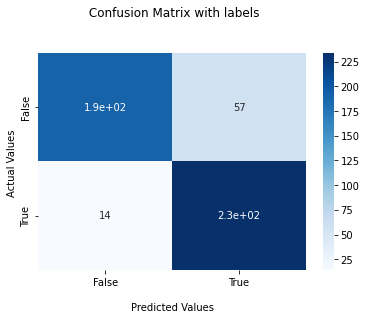

In [82]:
ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title(' Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# 4) KNN

In [83]:
param_grid = {'n_neighbors': [2, 4, 6, 8, 10]}
 
knn = GridSearchCV(KNeighborsClassifier(), param_grid, refit = True, verbose = 1)
knn.fit(X_train,y_train)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [2, 4, 6, 8, 10]}, verbose=1)

In [84]:
y_pred = knn.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,

In [85]:
cm = confusion_matrix(y_test, y_pred)
ac5 = accuracy_score(y_test,y_pred)
cr=classification_report(y_test,y_pred)
print(cm)
print('accuracy =',ac5)
print(cr)

[[199  49]
 [ 21 227]]
accuracy = 0.8588709677419355
              precision    recall  f1-score   support

           0       0.90      0.80      0.85       248
           1       0.82      0.92      0.87       248

    accuracy                           0.86       496
   macro avg       0.86      0.86      0.86       496
weighted avg       0.86      0.86      0.86       496



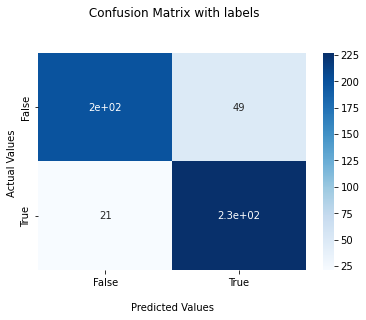

In [86]:
ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title(' Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

# 5) Decision Tree Classifier:

In [87]:
param_grid = {'criterion':['entropy','gini'],
              'max_depth':[2,4,6,8,10,12]}
 
dt = GridSearchCV(DecisionTreeClassifier(), param_grid, refit = True, verbose = 1)
dt.fit(X_train,y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [2, 4, 6, 8, 10, 12]},
             verbose=1)

In [88]:
y_pred = dt.predict(X_test)
y_pred

array([1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0,

In [89]:
cm = confusion_matrix(y_test, y_pred)
ac6 = accuracy_score(y_test,y_pred)
cr=classification_report(y_test,y_pred)
print(cm)
print('accuracy =',ac6)
print(cr)

[[212  36]
 [ 11 237]]
accuracy = 0.905241935483871
              precision    recall  f1-score   support

           0       0.95      0.85      0.90       248
           1       0.87      0.96      0.91       248

    accuracy                           0.91       496
   macro avg       0.91      0.91      0.91       496
weighted avg       0.91      0.91      0.91       496



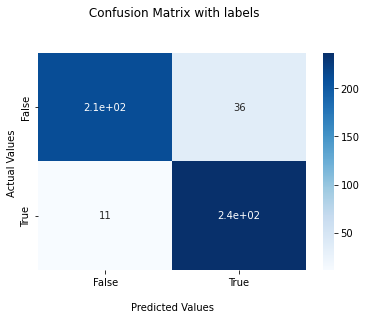

In [90]:
ax = sns.heatmap(cm, annot=True, cmap='Blues')

ax.set_title(' Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

In [91]:
from io import StringIO
import pydotplus
import matplotlib.image as mpimg
from sklearn import tree
from IPython.display import Image
import os

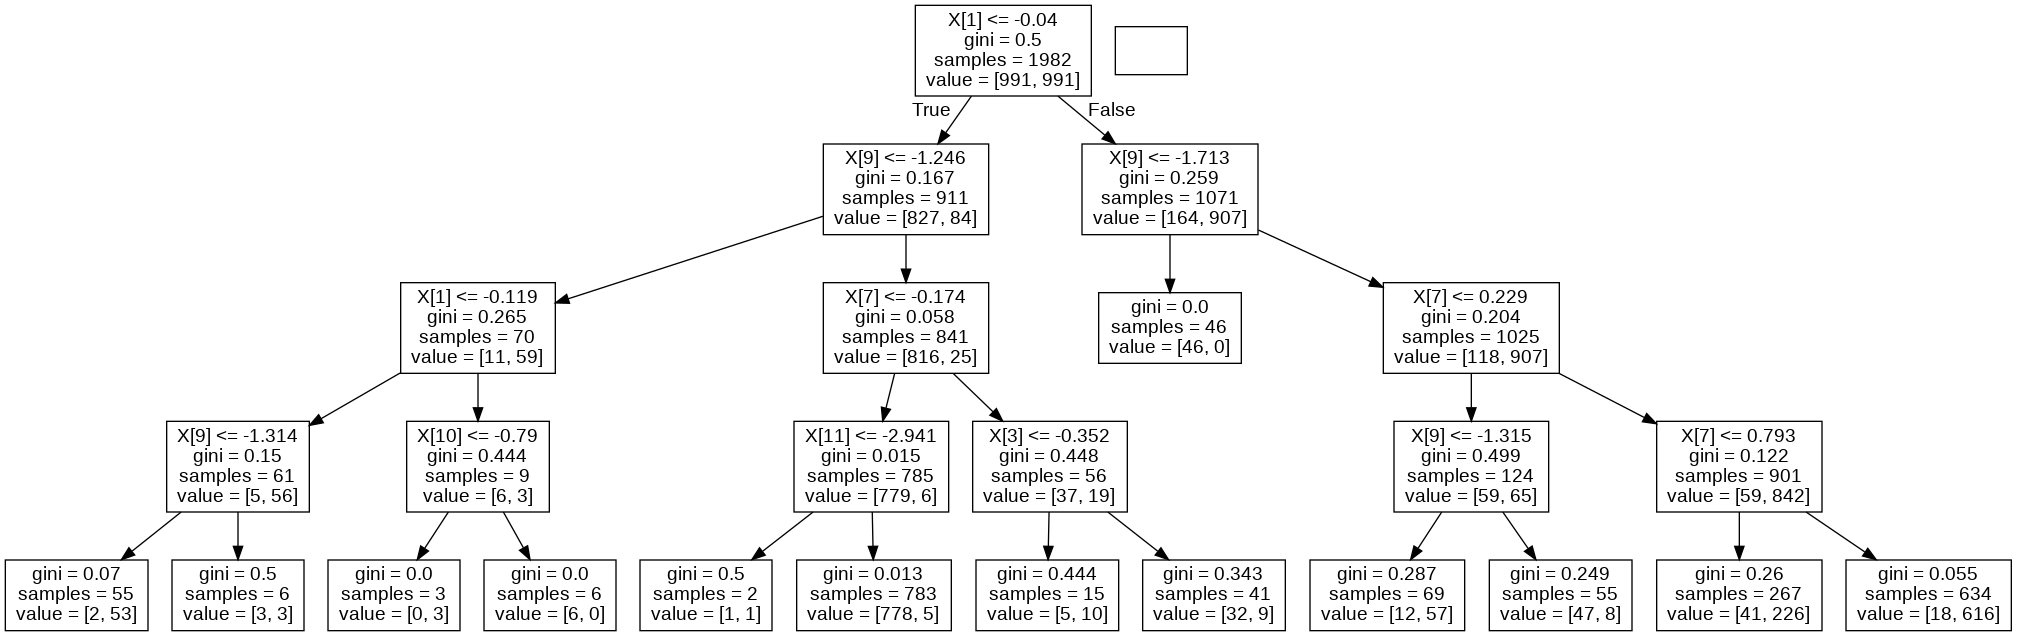

In [96]:
tree.export_graphviz(dt.best_estimator_,out_file='tree.dot') 
dot_data = StringIO() 
tree.export_graphviz(dt.best_estimator_, out_file=dot_data) 
graph = pydotplus.graph_from_dot_data(dot_data.getvalue()) 
a=graph.write_png("tree.png") 
Image(filename=os.getcwd()+'/tree.png')

In [94]:
print('accuracy for Logistic regression =', round(ac1*100,5) , '%')
print('accuracy for ANN =', round(ac3*100,5) , '%')
print('accuracy for SVM =', round(ac4*100,5) , '%')
print('accuracy for KNN =', round(ac5*100,5) , '%')
print('accuracy for Decision tree =', round(ac6*100,5) , '%')

accuracy for Logistic regression = 83.66935 %
accuracy for ANN = 85.68548 %
accuracy for SVM = 85.68548 %
accuracy for KNN = 85.8871 %
accuracy for Decision tree = 90.52419 %


# Results

* We implemented a Logistic Regression, ANN, SVM, KNN and Decision Tree Classifier for classification . 

* All model are giving nearly same accuracy of almost 90% so we can’t choose one over another just based on accuracy alone but with help of any of these model we can predict success or failure of a movie.
 
* Predicting movie revenue can significantly impact the movie industries and is the prime focus area for movie companies to remain profitable. Based on predictions a movie house can change its release strategy to either cut losses or increase movies chance of success.

* In real world this can mean a loss or gain of millions of dollars and hence, researchers worldwide had undertaken significant research to understand which factors can affect the increase in movie revenue. Factors such as budget, popularity, vote count, and movie genre can increase movie revenue.